In [19]:
# Import the dependencies.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import time
# Import the requests library.
import requests
# Import the datetime module from the datetime library.
from datetime import datetime
# Import the API key.
from config import weather_api_key
url = "https://api.openweathermap.org/data/2.5/weather?units=Imperial&appid="+ weather_api_key


In [20]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs

In [21]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)

In [22]:
# Use the citipy module to determine city based on latitude and longitude.
from citipy import citipy

In [23]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

665

In [24]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1

# Loop through all the cities in our list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
        time.sleep(60)

    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")
    
    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1
    # Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | butaritari
Processing Record 2 of Set 1 | albany
Processing Record 3 of Set 1 | punta arenas
Processing Record 4 of Set 1 | anadyr
Processing Record 5 of Set 1 | tsihombe
City not found. Skipping...
Processing Record 6 of Set 1 | nhulunbuy
Processing Record 7 of Set 1 | yellowknife
Processing Record 8 of Set 1 | rikitea
Processing Record 9 of Set 1 | caravelas
Processing Record 10 of Set 1 | aburi
Processing Record 11 of Set 1 | carnarvon
Processing Record 12 of Set 1 | trincomalee
Processing Record 13 of Set 1 | bluff
Processing Record 14 of Set 1 | atuona
Processing Record 15 of Set 1 | puerto ayora
Processing Record 16 of Set 1 | rafaela
Processing Record 17 of Set 1 | mataura
Processing Record 18 of Set 1 | khatanga
Processing Record 19 of Set 1 | mehamn
Processing Record 20 of Set 1 | cabo san lucas
Processing Record 21 of Set 1 | sahuaripa
Processing Record 22 of Set 1 | campbell river
Proc

City not found. Skipping...
Processing Record 36 of Set 4 | itamaraca
Processing Record 37 of Set 4 | kharp
Processing Record 38 of Set 4 | high level
Processing Record 39 of Set 4 | rawson
Processing Record 40 of Set 4 | saint anthony
Processing Record 41 of Set 4 | farmington
Processing Record 42 of Set 4 | khani
Processing Record 43 of Set 4 | prieska
Processing Record 44 of Set 4 | juneau
Processing Record 45 of Set 4 | palabuhanratu
City not found. Skipping...
Processing Record 46 of Set 4 | cerritos
Processing Record 47 of Set 4 | saskylakh
Processing Record 48 of Set 4 | gilgit
Processing Record 49 of Set 4 | orlik
Processing Record 50 of Set 4 | muros
Processing Record 1 of Set 5 | conil
Processing Record 2 of Set 5 | san fernando
Processing Record 3 of Set 5 | binga
Processing Record 4 of Set 5 | bobrov
Processing Record 5 of Set 5 | russell
Processing Record 6 of Set 5 | andenes
Processing Record 7 of Set 5 | pisco
Processing Record 8 of Set 5 | oranjemund
Processing Record 9

Processing Record 26 of Set 8 | tacuarembo
Processing Record 27 of Set 8 | hvide sande
Processing Record 28 of Set 8 | klyuchi
Processing Record 29 of Set 8 | vila velha
Processing Record 30 of Set 8 | yaring
Processing Record 31 of Set 8 | kandalaksha
Processing Record 32 of Set 8 | auki
Processing Record 33 of Set 8 | batemans bay
Processing Record 34 of Set 8 | acolla
Processing Record 35 of Set 8 | gorin
Processing Record 36 of Set 8 | mazagao
Processing Record 37 of Set 8 | barcelos
Processing Record 38 of Set 8 | greenville
Processing Record 39 of Set 8 | ngunguru
Processing Record 40 of Set 8 | yarkovo
Processing Record 41 of Set 8 | qasigiannguit
Processing Record 42 of Set 8 | garoua boulai
Processing Record 43 of Set 8 | khunti
Processing Record 44 of Set 8 | bend
Processing Record 45 of Set 8 | constitucion
Processing Record 46 of Set 8 | mayo
Processing Record 47 of Set 8 | bathsheba
Processing Record 48 of Set 8 | aksu
Processing Record 49 of Set 8 | tera
Processing Record

City not found. Skipping...
Processing Record 13 of Set 12 | bogoslovka
Processing Record 14 of Set 12 | honningsvag
Processing Record 15 of Set 12 | soledade
Processing Record 16 of Set 12 | egvekinot
Processing Record 17 of Set 12 | rorvik
Processing Record 18 of Set 12 | camacha
Processing Record 19 of Set 12 | aswan
Processing Record 20 of Set 12 | tirumullaivasal
Processing Record 21 of Set 12 | pacific grove
Processing Record 22 of Set 12 | cozumel
Processing Record 23 of Set 12 | namanga
Processing Record 24 of Set 12 | anamur
Processing Record 25 of Set 12 | isla vista
Processing Record 26 of Set 12 | bandarbeyla
Processing Record 27 of Set 12 | miquelon
Processing Record 28 of Set 12 | lubango
Processing Record 29 of Set 12 | santa isabel
Processing Record 30 of Set 12 | viligili
City not found. Skipping...
Processing Record 31 of Set 12 | hunza
City not found. Skipping...
Processing Record 32 of Set 12 | henties bay
Processing Record 33 of Set 12 | pontianak
Processing Record

In [25]:
len(city_data)

608

In [26]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Butaritari,3.0707,172.7902,81.79,75,15,12.21,KI,2022-04-18 23:11:24
1,Albany,42.6001,-73.9662,51.57,37,100,8.99,US,2022-04-18 23:12:36
2,Punta Arenas,-53.1500,-70.9167,48.31,76,75,13.80,CL,2022-04-18 23:07:39
3,Anadyr,64.7500,177.4833,32.50,92,75,13.42,RU,2022-04-18 23:14:03
4,Nhulunbuy,-12.2333,136.7667,81.21,83,75,6.91,AU,2022-04-18 23:14:04
5,Yellowknife,62.4560,-114.3525,24.57,35,95,5.01,CA,2022-04-18 23:14:05
6,Rikitea,-23.1203,-134.9692,78.57,70,7,14.45,PF,2022-04-18 23:12:24
7,Caravelas,-17.7125,-39.2481,76.86,68,38,9.89,BR,2022-04-18 23:14:06
8,Aburi,5.8472,-0.1775,72.50,82,100,3.18,GH,2022-04-18 23:14:06
9,Carnarvon,-24.8667,113.6333,73.00,52,29,14.94,AU,2022-04-18 23:10:11


In [27]:
new_column_order = ['City', 'Country', 'Date', 'Lat', 'Lng', 'Max Temp',
                    'Humidity', 'Cloudiness', 'Wind Speed']
city_data_df = city_data_df[new_column_order]
city_data_df.head(10)

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Butaritari,KI,2022-04-18 23:11:24,3.0707,172.7902,81.79,75,15,12.21
1,Albany,US,2022-04-18 23:12:36,42.6001,-73.9662,51.57,37,100,8.99
2,Punta Arenas,CL,2022-04-18 23:07:39,-53.1500,-70.9167,48.31,76,75,13.80
3,Anadyr,RU,2022-04-18 23:14:03,64.7500,177.4833,32.50,92,75,13.42
4,Nhulunbuy,AU,2022-04-18 23:14:04,-12.2333,136.7667,81.21,83,75,6.91
5,Yellowknife,CA,2022-04-18 23:14:05,62.4560,-114.3525,24.57,35,95,5.01
6,Rikitea,PF,2022-04-18 23:12:24,-23.1203,-134.9692,78.57,70,7,14.45
7,Caravelas,BR,2022-04-18 23:14:06,-17.7125,-39.2481,76.86,68,38,9.89
8,Aburi,GH,2022-04-18 23:14:06,5.8472,-0.1775,72.50,82,100,3.18
9,Carnarvon,AU,2022-04-18 23:10:11,-24.8667,113.6333,73.00,52,29,14.94


In [28]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [29]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

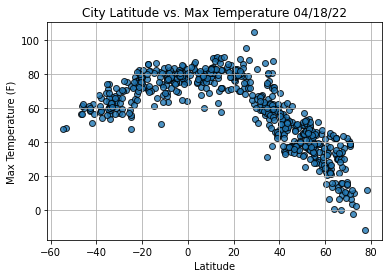

In [30]:
# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

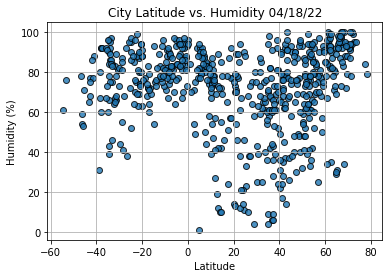

In [31]:
# Build the scatter plots for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig2.png")
# Show plot.
plt.show()

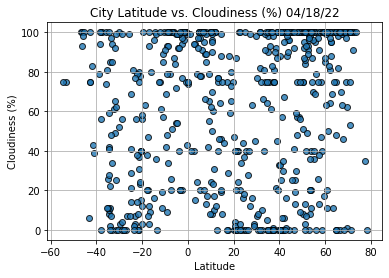

In [32]:
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig3.png")
# Show plot.
plt.show()

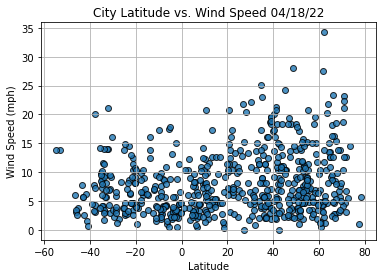

In [33]:
# Build the scatter plots for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig4.png")
# Show plot.
plt.show()